# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [2]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
X_train.shape, X_test.shape

((39209, 32, 32, 3), (12630, 32, 32, 3))

In [86]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

In [569]:
label_description = pd.read_csv("signnames.csv")

def get_label_name(label, df=label_description):
    return df[df['ClassId'] == label]['SignName'].values[0]

In [557]:
label_description['SignName']

0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vechiles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vechiles
16             Vechiles over 3.5 metric tons prohibited
17                                             N

In [7]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = label_description.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
from matplotlib import pyplot as plt

# Data Exploration Visualization

<h3>1. The distribution of classes</h3>
<p>The number of training data are unevenly distributed across clasess. This may leads to the underpresented class been overlooked in the model</p>

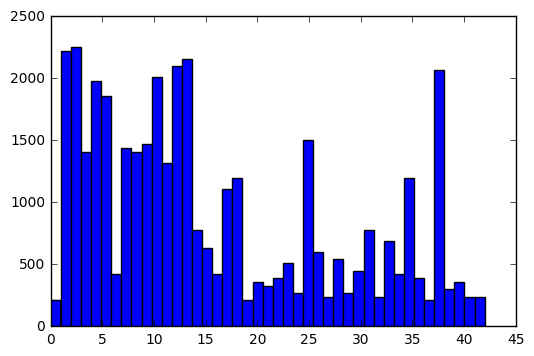

In [11]:
plt.hist(y_train, bins=n_classes)
plt.show()

In [12]:
y_train_df = pd.DataFrame(y_train, columns="ClassId".split())
y_train_df = pd.merge(y_train_df, label_description, on="ClassId", how="left")

In [26]:
pd.DataFrame(y_train_df.groupby("SignName").count()).sort_values('ClassId', ascending=False)

ClassId
SignName                                                   
Speed limit (50km/h)                                   2250
Speed limit (30km/h)                                   2220
Yield                                                  2160
Priority road                                          2100
Keep right                                             2070
No passing for vechiles over 3.5 metric tons           2010
Speed limit (70km/h)                                   1980
Speed limit (80km/h)                                   1860
Road work                                              1500
No passing                                             1470
Speed limit (100km/h)                                  1440
Speed limit (60km/h)                                   1410
Speed limit (120km/h)                                  1410
Right-of-way at the next intersection                  1320
Ahead only                                             1200
General caution                                        1200
No entry                                               1110
Wild animals crossing                                   780
Stop                                                    780
Turn right ahead                                        689
No vechiles                                             630
Traffic signals                                         600
Children crossing                                       540
Slippery road                                           510
Beware of ice/snow                                      450
End of speed limit (80km/h)                             420
Vechiles over 3.5 metric tons prohibited                420
Turn left ahead                                         420
Go straight or right                                    390
Bumpy road                                              390
Roundabout mandatory                                    360
Dangerous curve to the right                            360
Double curve                                            330
Keep left                                               300
Bicycles crossing                                       270
Road narrows on the right                               270
End of all speed and passing limits                     240
End of no passing                                       240
End of no passing by vechiles over 3.5 metric tons      240
Pedestrians                                             240
Dangerous curve to the left                             210
Speed limit (20km/h)                                    210
Go straight or left                                     210

In [127]:
image_indexed_by_label = {label: np.nonzero(y_train == label)[0] for label in range(n_classes)}

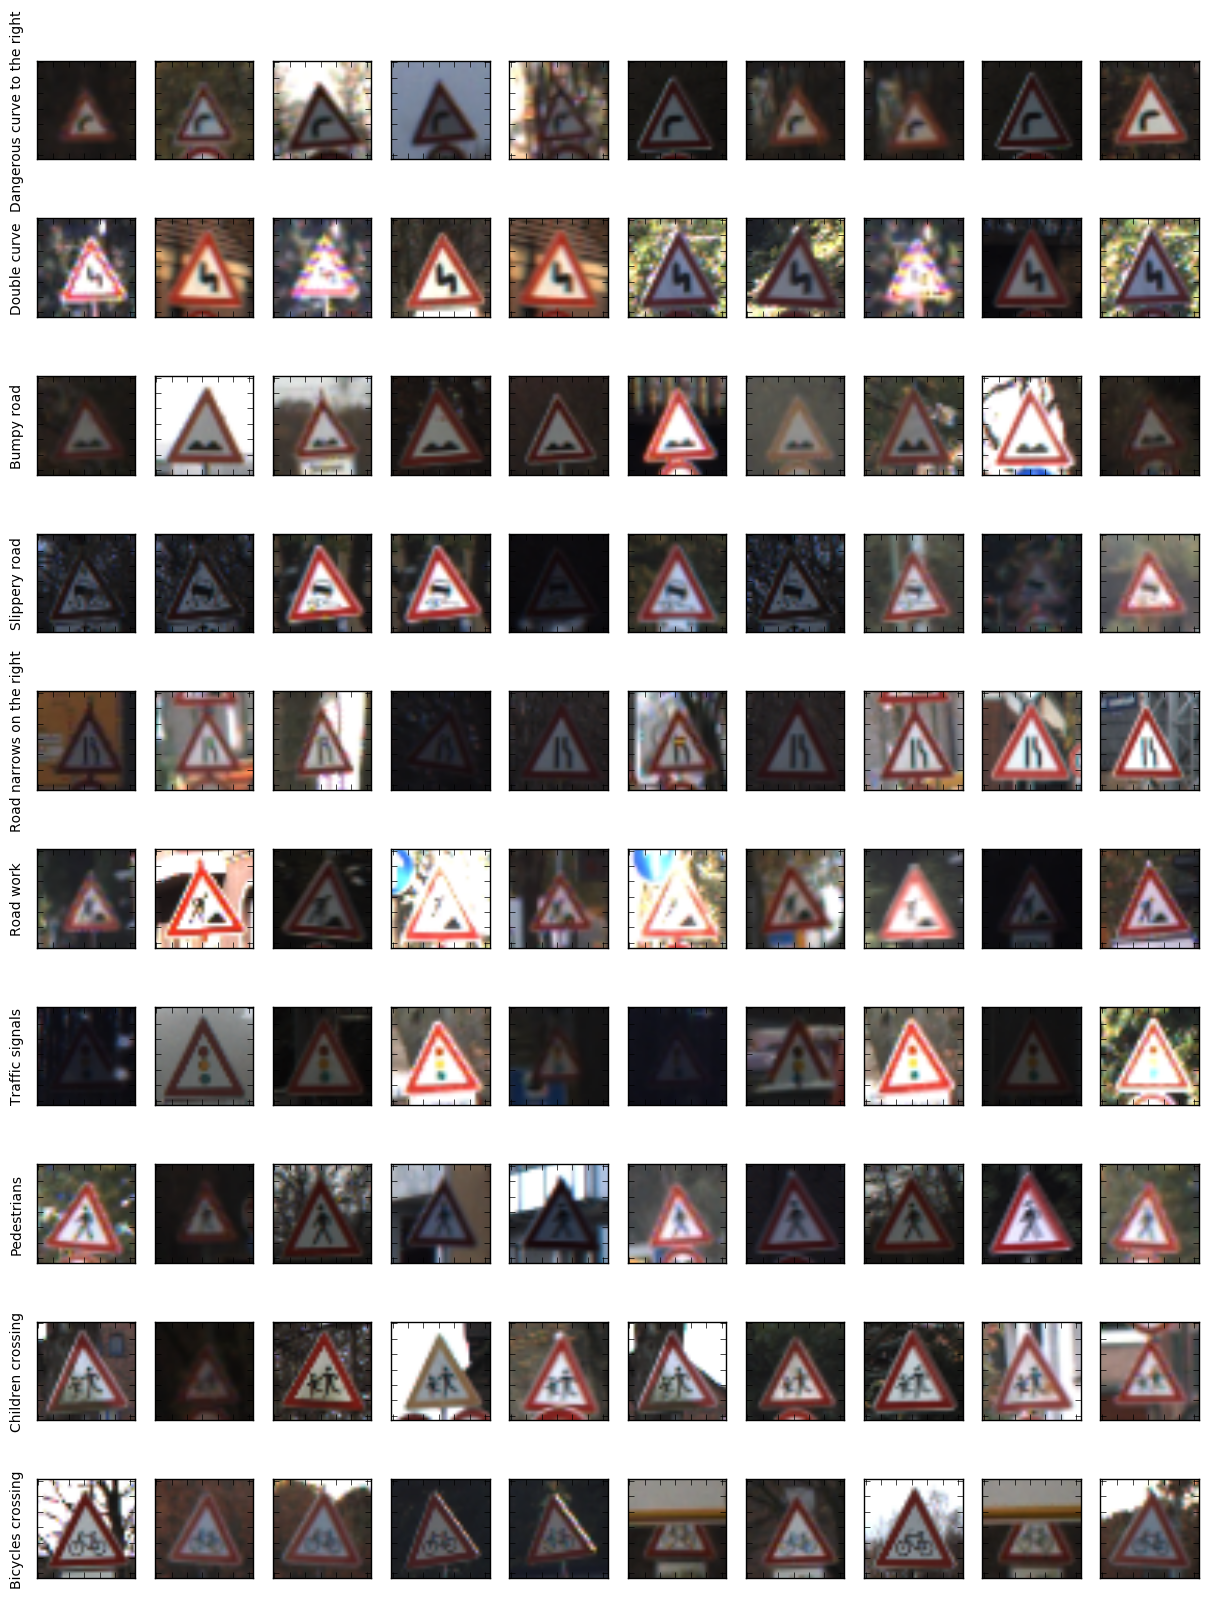

In [664]:
# label number starts from 0 to 42
starts = 20
ends = 30


cols = 10
rows = ends - starts
f, axarr = plt.subplots(rows, cols)
# f.tight_layout(pad=1.0)
f.set_size_inches(w=15, h=20)
for label in range(starts, ends):
    for p, idx in enumerate(np.random.choice(image_indexed_by_label[label], size=cols, replace=False)):
        row = label % rows
        a = axarr[row, p]
        if p == 0:
            label_name = get_label_name(label)
            a.set_ylabel(label_name)
        a.imshow(X_train[idx])
        a.grid(b=False)
        a.set_xticklabels([])
        a.set_yticklabels([])
        
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

<p>Supposely normalize the data to -0.5 ~ 0.5 range will have benifits like numerical stability
<p>I use code in the following cell for the first few attempts, but the highest accuracy I got happened to be without this normalization. (may due to the difference in parameters and layer changes)</p>
<p>So as far as I see it has not so obvious effect on final result.</p>

In [814]:
# did not actually use this normalization

# X_train = X_train / 255 - 0.5
# X_test = X_test / 255 - 0.5

In [2]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [782]:
"""
Make copy and random transformation to training data
thus make the label distribution more balanced
"""

def resample_and_augumentation(X_train, y_train, target=4000, mean=.85, std=.01, aug="affine"):
    """
    resample the under-represented classes
    by set a higher factor value
    """
    number_of_class = np.unique(y_train).shape[0]
    image_index_by_label = {label: np.flatnonzero(y_train == label) for label in range(number_of_class)}
    
    new_images = []
    new_labels = []
    for label, image_indices in tqdm_notebook(image_index_by_label.items()):
        image_count = len(image_indices)
        number_of_images_to_generate = target - image_count
        if number_of_images_to_generate <= 0:
            continue
        
        # draw the original images we want to transform, with replacement
        original_image_indices = np.random.choice(image_indices, size=number_of_images_to_generate, replace=True)
        for original_image_idx in original_image_indices:
            original_image = X_train[original_image_idx]
            if aug == "affine":
                transformed_image = random_affine_transform(original_image, 20, 10, 5)
            elif aug == "perspective":
                transformed_image = perspective_transform(original_image)
            else:
                transformed_image = original_image
            
            new_images.append(transformed_image)
            new_labels.append(y_train[original_image_idx])
        
#     print(y_train.shape, len(new_labels))
    new_labels = np.concatenate((y_train, np.array(new_labels)))
    new_images = np.concatenate((X_train, new_images))
    print("data shape after augumentation. X: %s, y: %s" % (new_images.shape, new_labels.shape))
    return new_images, new_labels
    

In [93]:
def perspective_transform(original_image, dtype=np.float16):
    rows,cols,ch = original_image.shape
    origial_pts = np.float32([[0,0],[rows,0],
                       [0,cols],[rows,cols]])
    shrink = np.random.normal(mean, std)
    if np.random.uniform() > 0.5:
        dst_pts = np.float32([[0, cols * (1 - shrink)], [rows, 0],
                     [0, cols * shrink], [rows, cols]])
    else:
        dst_pts = np.float32([[0, 0], [rows, cols * (1 - shrink)],
                     [0, cols], [rows, cols * shrink]])

    M = cv2.getPerspectiveTransform(pts1,dpts)
    dst = cv2.warpPerspective(original_image, M, (rows,cols),dst_pts,
                              cv2.INTER_LINEAR+cv2.WARP_FILL_OUTLIERS, cv2.BORDER_REPLICATE).astype(dtype)
    return dst

    

In [92]:
"""
'borrowed'from
https://carnd-udacity.atlassian.net/wiki/cq/viewquestion.action?id=10322627&questionTitle=project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image
"""
def random_affine_transform(img, ang_range, shear_range, trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Each picture of traffic signs is of different angles and scales, to make to model more general, I initially used ["perspecitve projection"](https://www.youtube.com/watch?v=QR8bt3gwH58) to generate several variated copies of a same sign. I noticed that other student used [affine transformation](https://carnd-udacity.atlassian.net/wiki/cq/viewquestion.action?id=10322627&questionTitle=project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image) for the same purpose. I found that this approche leads to higher accuracy on test data and thus use his procedure instead.

The labels in the training data are unevenly distributed, largest label classes are 10x more than the smallest ones.
and it turned out those label class with fewest training examples almost always suffers from a low accuracy on test data.

Based on the above reasons I generated additional data like this:
<li>found the label with most number of training cases, then multipy by a pre-determined factor (e.g. 2), the result is used as the target number that each class of tranining cases required to meet.</li>
<li>use the above mentioned affine transformation procedure to genreate new data in each label class until the number of traninig cases of that class reached the target.</li>


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


In [207]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from keras.utils import np_utils
import pickle
from tqdm import tqdm_notebook
import cv2
import itertools

from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

from keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


<h3>Solution with highest test accuracy</h3>

In [787]:
number_of_class = len(np.unique(y_train))
model1 = keras.models.Sequential()
model1.add(Convolution2D(32, 2, 2, activation='relu', input_shape=(32, 32, 3), border_mode='valid', bias=True))
model1.add(Convolution2D(32, 3, 3, activation='relu', border_mode='valid', bias=True))
model1.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid', dim_ordering='default', strides=(2,2)))
model1.add(Convolution2D(32, 2, 2, activation='relu', border_mode='valid', bias=True))
model1.add(Convolution2D(32, 3, 3, activation='relu', border_mode='valid', bias=True))
model1.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid', dim_ordering='default', strides=(2,2)))
model1.add(Dropout(0.5))
model1.add(Convolution2D(48, 3, 3, activation='relu', border_mode='valid', bias=True))
model1.add(Flatten())
model1.add(Dense(108, name='hidden1', activation='relu'))
model1.add(Dense(number_of_class, name='output', activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(decay=0.),
              metrics=['accuracy'])

model1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_57 (Convolution2D) (None, 31, 31, 32)    416         convolution2d_input_18[0][0]     
____________________________________________________________________________________________________
convolution2d_58 (Convolution2D) (None, 29, 29, 32)    9248        convolution2d_57[0][0]           
____________________________________________________________________________________________________
maxpooling2d_33 (MaxPooling2D)   (None, 14, 14, 32)    0           convolution2d_58[0][0]           
____________________________________________________________________________________________________
convolution2d_59 (Convolution2D) (None, 13, 13, 32)    4128        maxpooling2d_33[0][0]            
___________________________________________________________________________________________

<h3>Notice: </h3>
<p>It's until late that I realized I was supposed to build CNN directly using <b>Tensorflow</b>.</p>
<p>Due to I <b>jumped to Keras lesson</b> before doing the project, plus I <b>missed the requirement</b> in the project intro that Tensorflow is the tool to use.</p> I used <b>Keras</b> to build my model instead. 
<p>Since it seems the project is more focus on modeling and data pre-processing rather than building underlining computation structures I still submitted with code in <b>Keras</b></p>

**Answer:**

<h4>Final Architecture:</h4>
<p></p>
<b>[conv2d x 2 -> maxpooling] x 2 -> dropout -> conv2d -> fc -> classifier</b>

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I came up with the following train_with_data function, which I found handy in controlling and tunning the training process.

with each call of train_with_data, a new batch of augumented images were generated for training, while the original copies are always put into the traninig set. So in each round of training, the information carried by original picures are always been take into account.

Between each call to the function, I may choose to decrease the learning rate, in order to get through stagnation of losses.

I choose the Adam optimizer with default batch_size of 128, I started with default learning rate. After some epoch I decrease the learning rate.


In [781]:
def train_with_data(model, X, y, augument, test_size=0.25, seed=42, batch_size=128, nb_epoch=5, aug_factor=2):
    """
    augument the data and then train
    """

    X_train_split, X_val_split, \
        y_train_split, y_val_split = train_test_split(X, y,
                                                      test_size=test_size, random_state=seed)
    
    print("train validation split. train:%s | validation: %s | ratio: %f" % (len(X_train_split), len(X_val_split), test_size))
    target = int(np.bincount(y).max() * aug_factor)
    print("augumentation target: %d" % target, " factor: %0.1f" % aug_factor)
    X_train_split_aug, y_train_split_aug = augument(X_train_split, y_train_split, target=target)
    history = model.fit(X_train_split_aug, np_utils.to_categorical(y_train_split_aug),
                            batch_size=batch_size, nb_epoch=nb_epoch,
                            validation_data=(X_val_split, np_utils.to_categorical(y_val_split)),
                            verbose=1)
    return history

In [ ]:
# if you want skip training, I have saved model and weights 
# model1 = keras.models.load_model("model1.h5")

In [788]:
print("phase 1, lr=", model1.optimizer.get_config()['lr'])
train_with_data(model1, X_train, y_train, resample_and_augumentation, nb_epoch=2, aug_factor=2)
train_with_data(model1, X_train, y_train, resample_and_augumentation, nb_epoch=3, aug_factor=2)
model1.optimizer.lr /= 10
print("phase 2, lr=", model1.optimizer.get_config()['lr'])
train_with_data(model1, X_train, y_train, resample_and_augumentation, nb_epoch=2, aug_factor=3)

# will reach little bit more than 0.95 of accracy and 0.27 of losses at end of "phase 2"


phase 1, lr= 0.0010000000474974513
train validation split. train:29406 | validation: 9803 | ratio: 0.250000
augumentation target: 4500  factor: 2.0

data shape after augumentation. X: (193500, 32, 32, 3), y: (193500,)
Train on 193500 samples, validate on 9803 samples
Epoch 1/2
193500/193500 [==============================] - 592s - loss: 1.5750 - acc: 0.5200 - val_loss: 0.2342 - val_acc: 0.9440
Epoch 2/2
193500/193500 [==============================] - 591s - loss: 0.5896 - acc: 0.8137 - val_loss: 0.1055 - val_acc: 0.9695
train validation split. train:29406 | validation: 9803 | ratio: 0.250000
augumentation target: 4500  factor: 2.0

data shape after augumentation. X: (193500, 32, 32, 3), y: (193500,)
Train on 193500 samples, validate on 9803 samples
Epoch 1/3
193500/193500 [==============================] - 588s - loss: 0.4311 - acc: 0.8649 - val_loss: 0.0973 - val_acc: 0.9675
Epoch 2/3
193500/193500 [==============================] - 589s - loss: 0.3598 - acc: 0.8873 - val_loss: 0.07

In [789]:
model1.evaluate(X_test, np_utils.to_categorical(y_test))

12630/12630 [==============================] - 14s    


[0.22192579766105705, 0.95391923995218109]

In [793]:
# train more
model1.optimizer.lr /= 10
print("phase 3, lr=", model1.optimizer.get_config()['lr'])
train_with_data(model1, X_train, y_train, resample_and_augumentation, nb_epoch=2, aug_factor=2.5)


phase 3, lr= 1.0000000656873453e-05
train validation split. train:29406 | validation: 9803 | ratio: 0.250000
augumentation target: 5625  factor: 2.5

data shape after augumentation. X: (241875, 32, 32, 3), y: (241875,)
Train on 241875 samples, validate on 9803 samples
Epoch 1/2
241875/241875 [==============================] - 729s - loss: 0.2434 - acc: 0.9256 - val_loss: 0.0354 - val_acc: 0.9890
Epoch 2/2
241875/241875 [==============================] - 733s - loss: 0.2272 - acc: 0.9312 - val_loss: 0.0405 - val_acc: 0.9863


In [795]:
# 0.955 seems the highest accuracy one could get using this model
model1.evaluate(X_test, np_utils.to_categorical(y_test))

12630/12630 [==============================] - 14s    


[0.22521250741180218, 0.95502771184450086]

** Randomly check some predictions result**

10/10 [==============================] - 0s


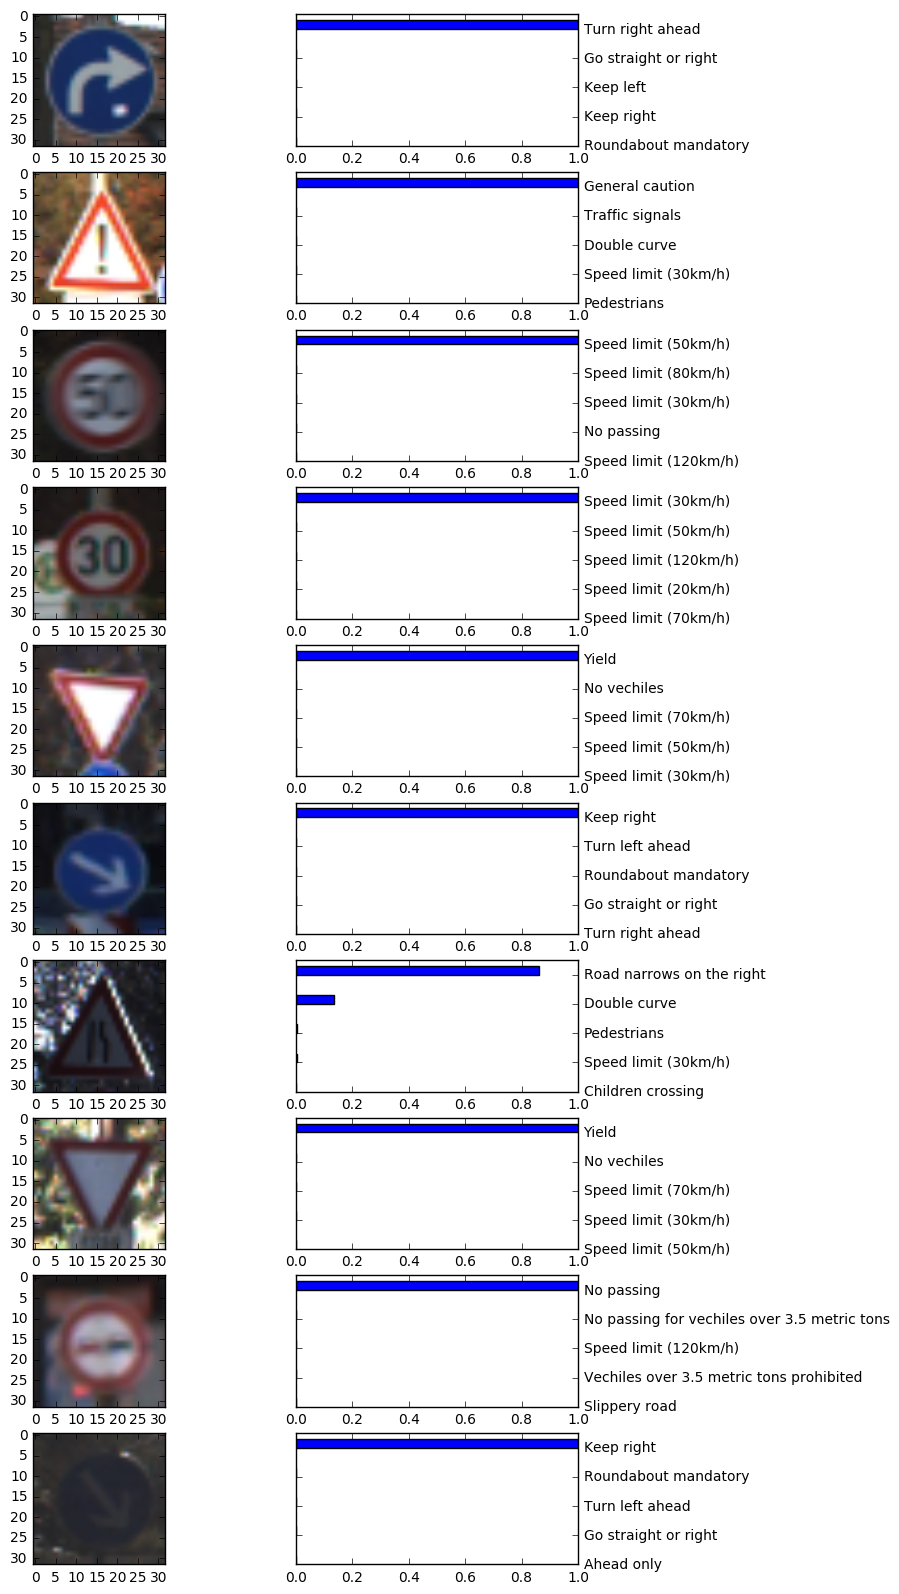

In [796]:
plot_prediction_prob(model1, X_test[np.random.randint(0, len(X_test), size=10)], k=5)

In [797]:
evaluation_predictions = model1.predict(X_test)
correct_predictions = np.array(np.argmax(evaluation_predictions, axis=1) == y_test)
wrong_predictions = np.array(np.argmax(evaluation_predictions, axis=1) != y_test)

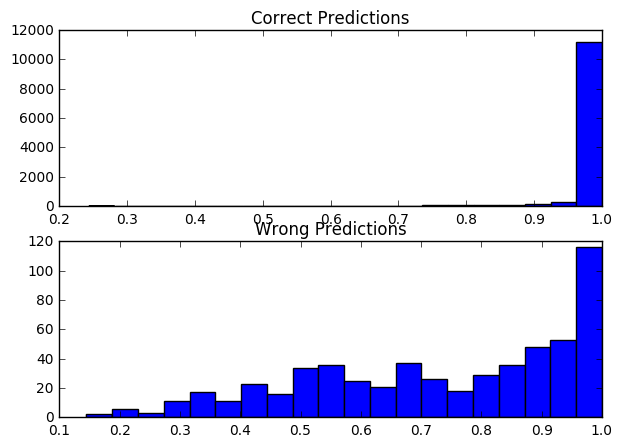

In [798]:
f, axies = plt.subplots(2,1)
f.set_size_inches((7,5))
axies[0].set_title("Correct Predictions")
axies[1].set_title("Wrong Predictions")
axies[0].hist(np.sort(evaluation_predictions[correct_predictions], axis=1)[:,-1], bins=20)
axies[1].hist(np.sort(evaluation_predictions[wrong_predictions], axis=1)[:,-1], bins=20)
plt.show()

<b>Finding:</b>  The model is pretty sure about those correct predictions and not so sure about those wrong predictions

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

My early efforts are spent in understanding the network architect in [Sermanet and LeCun's paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), but I don't know how to interpret the parameters descriped in the paper thus cannot follow the exact setup of its network.

Then I followed the [layers pattern](http://cs231n.github.io/convolutional-networks/#layerpat) section on Stanford CS231n course and built a layer structure simlilar to the current one: <b>[conv2d->maxpooling] * 2 -> dropout -> conv2d -> fc -> classifier</b> I trained with 40 epoch and reached 91% accuracy on test data but no more. I'm neither satisfied with the fianl result nor the relatively long training time.

I want to improve the model, several attempts are made (lot of time spent on training and comparing the result). Then finally come to the pattern: <b>[conv2d * 2 -> maxpooling] * 2 -> dropout -> conv2d -> fc -> classifier</b>. I found that with seemingly similar layer setup, a small change (say, change strips from (2,2) to (1,1)) in layer parameters greatly affect the total number of parameters. and the network will become slower to train and more likely to overfit.
So the guideline that leads me to the final solution was to increase the number of layers but carefully sets the  so that the number of weights do not "explode".

<h3>Confusion Matrix</h3>

In [519]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          size=(10, 10),
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=size)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] in (0.0, 0):
            continue
        plt.text(j, i, "%.2f" % cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def confusion_matrix_for_model(model, X, y, labels=43, size=(20,20), accuracy=True):
    def get_accuracy(cm, y):
        for label in range(labels):
            cm[label] = cm[label] / (y == label).sum()
        return cm
    
    predictions = model.predict_classes(X)
    print("accuracy: ", (predictions == y).sum() / y.shape[0])
    cm = confusion_matrix(y, predictions)
    if accuracy:
        cm = get_accuracy(cm.astype(np.float16), y)
    plot_confusion_matrix(cm, range(labels), size=size)

12630/12630 [==============================] - 14s    
0.955027711797
Confusion matrix, without normalization


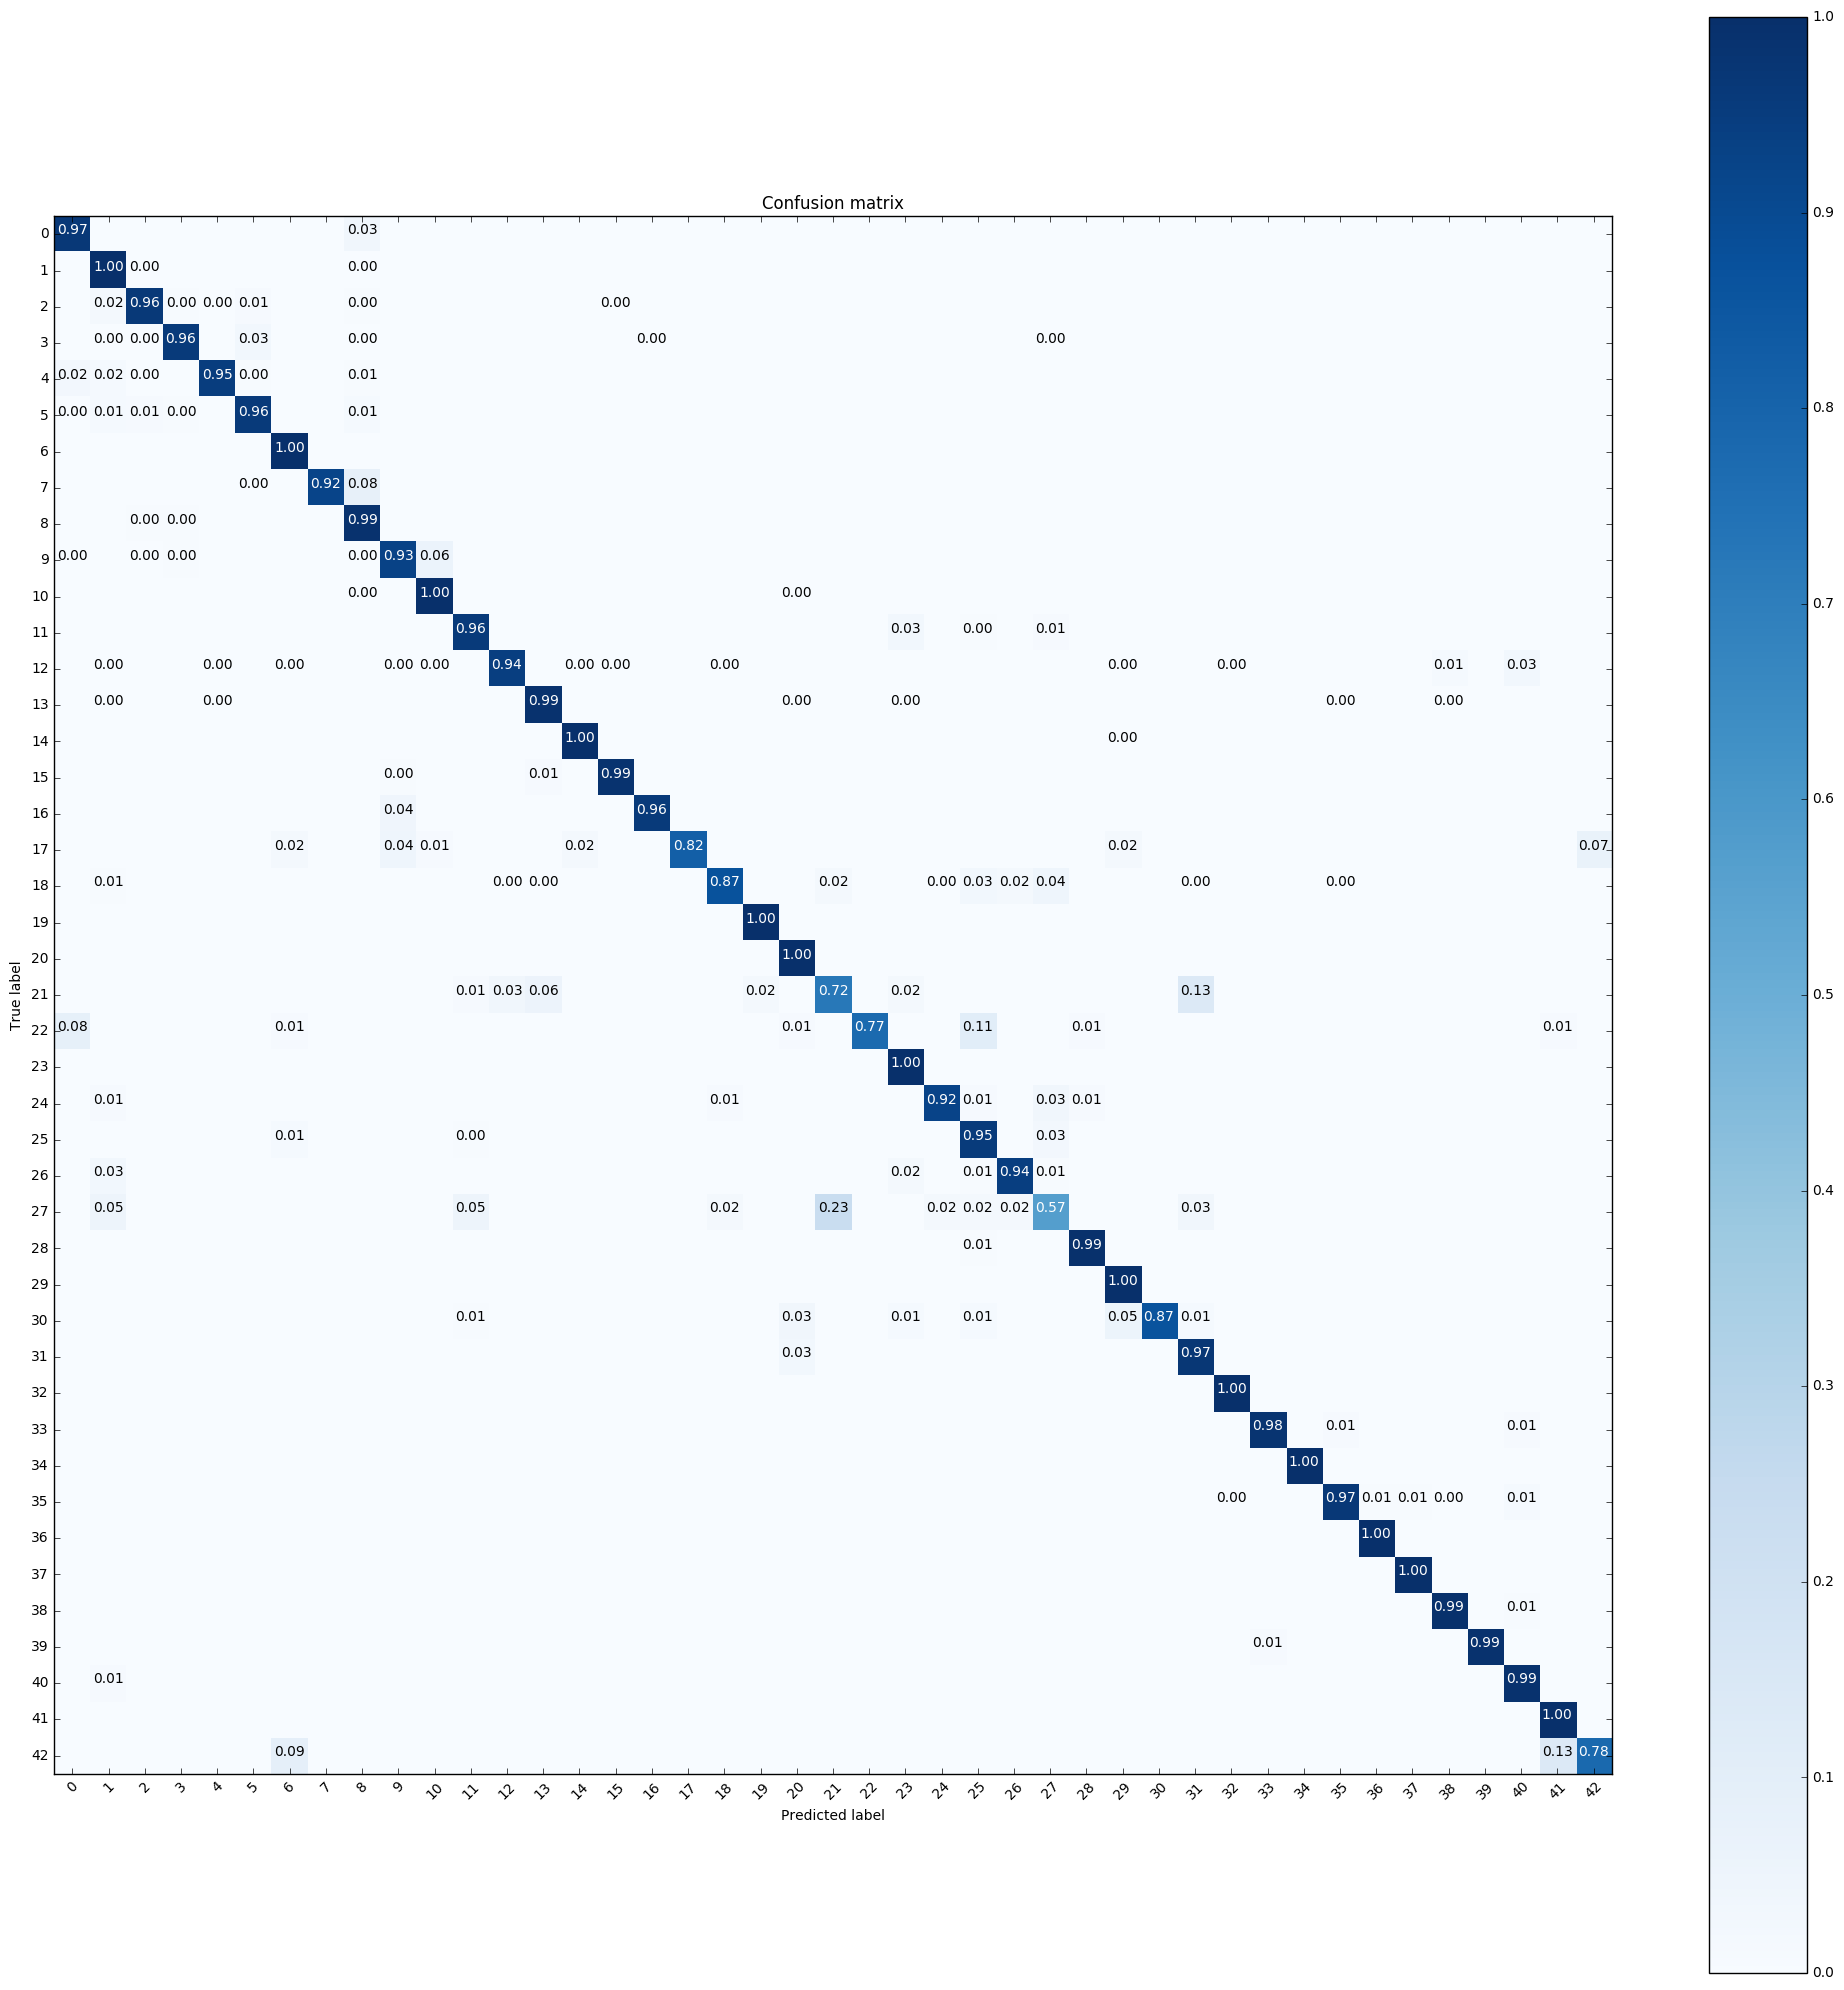

In [799]:
confusion_matrix_for_model(model1, X_test, y_test)

From the confusion matrix above, we sees that test cases with ClassId 21 and 27 have significant lower accuracy rates than others, they are very likely to be mis-classified into label 31 and 21 respectively.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



I live in Germany so I go around and captured some traffic signs near my place, but found afterwards that only part of their labels are in the training set, thus there's no chance to do the correct predictions. But it's interesting to see the result.

As we can see in a more comprehensive list of [Germen Traffic Signs](http://www.gettingaroundgermany.info/zeichen.shtml), The prediction in a real setting can be more challenge, since there are many similar traffic signs, or signs only make sense when appearing together.

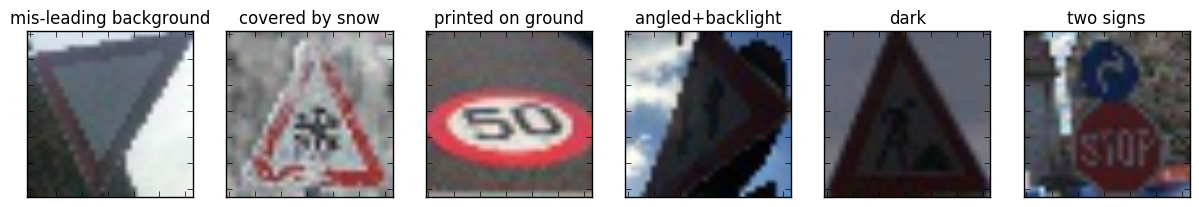

In [813]:
fnames = ["rIMG_5818.jpg", "web03.jpg", "web10.jpg", "rIMG_5835.jpg", "rIMG_5857.jpg", "rIMG_5836.jpg"]
notes = ["mis-leading background",
         "covered by snow",
         "printed on ground",
         "angled+backlight",
        "dark",
        "two signs"]
f, axies = plt.subplots(1, len(fnames))
f.set_size_inches((15, 5))
for a, fname, note in zip(axies, fnames, notes):
    img = plt.imread("my_pic/%s" % fname)
    a.imshow(img)
    a.set_title(note)
    a.set_xticklabels([])
    a.set_yticklabels([])
plt.show()

<h4>The above signs may be hard to predict</h4>

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

<h3> It depends.</h3>
<h4>There maybe advantanges in live camera scenario:</h4>
<ul> 
    <li>The camera length can be auto-adjusted to take better quality pictures</li>
    <li>Multiple frames of the same traffic sign (likely from different angles and distances) can be used as input, so the model got multiple chances for a single sign</li>
</ul>
<h4>disadvantage:</h4>
<ul>
    <li>A CNN with complex structres may not fast enough to do computations in real-time</li>
    <li>unable to recognize traffic signs that are not in the trainining data</li>
</ul>


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

<b>I use the following code to plot the traffic sign along with certainties of the predictions </b>

In [810]:

k = 5

def plot_prediction_prob(model, images, k, figure_size=(8,20)):
    predict_probs = model.predict_proba(images)
    topk_arr = np.argsort(predict_probs, axis=1)[:,-k:]
#     predictions = np.array([l in topk for l, topk in zip(correct_label, topk_arr)])
    topk_probs_and_labels = [ (probs[labels], [get_label_name(l) for l in labels] )  for probs, labels in zip(predict_probs, topk_arr)]


    f, axies = plt.subplots(len(topk_probs_and_labels), 2)
    f.set_size_inches(figure_size)
    for idx in range(len(topk_probs_and_labels)):
        probs, labels = topk_probs_and_labels[idx]
        left, right = axies[idx]
        right.set_xlim((0,1))
        left.set_xticklabels([])
        left.set_yticklabels([])
        left.set_xticks([])
        left.set_yticks([])
        left.imshow(images[idx])
        length = range(len(probs))
        right.tick_params(labelright=True, labelleft=False)
        right.barh(length, probs, tick_label=labels, height=0.3)

    plt.show()

6/6 [==============================] - 0s


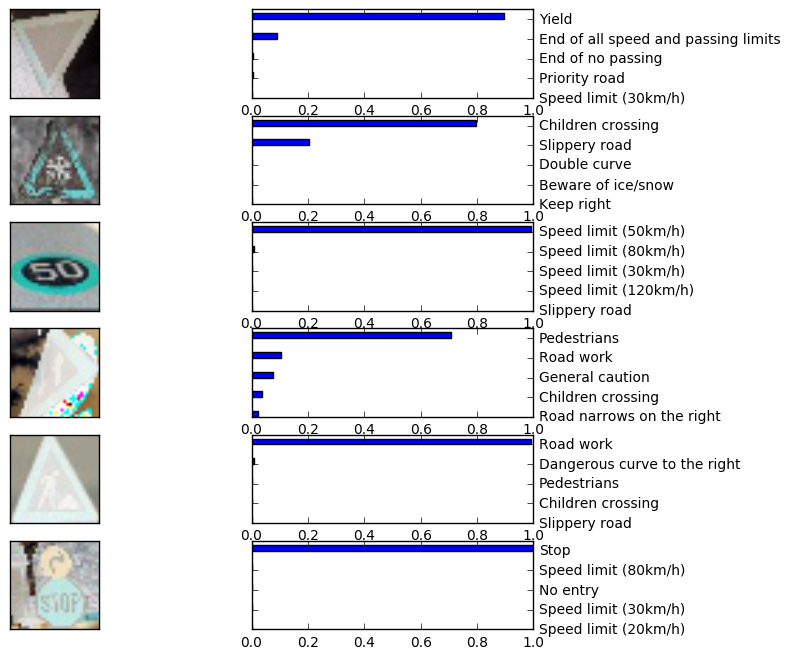

In [811]:
fnames = ["rIMG_5818.jpg", "web03.jpg", "web10.jpg", "rIMG_5835.jpg", "rIMG_5857.jpg", "rIMG_5836.jpg"]
my_images = np.array([ plt.imread("my_pic/%s" % fname) for fname in fnames ], dtype=np.int32)
plot_prediction_prob(model1, my_images, 5, figure_size=(8,8))

12/12 [==============================] - 0s


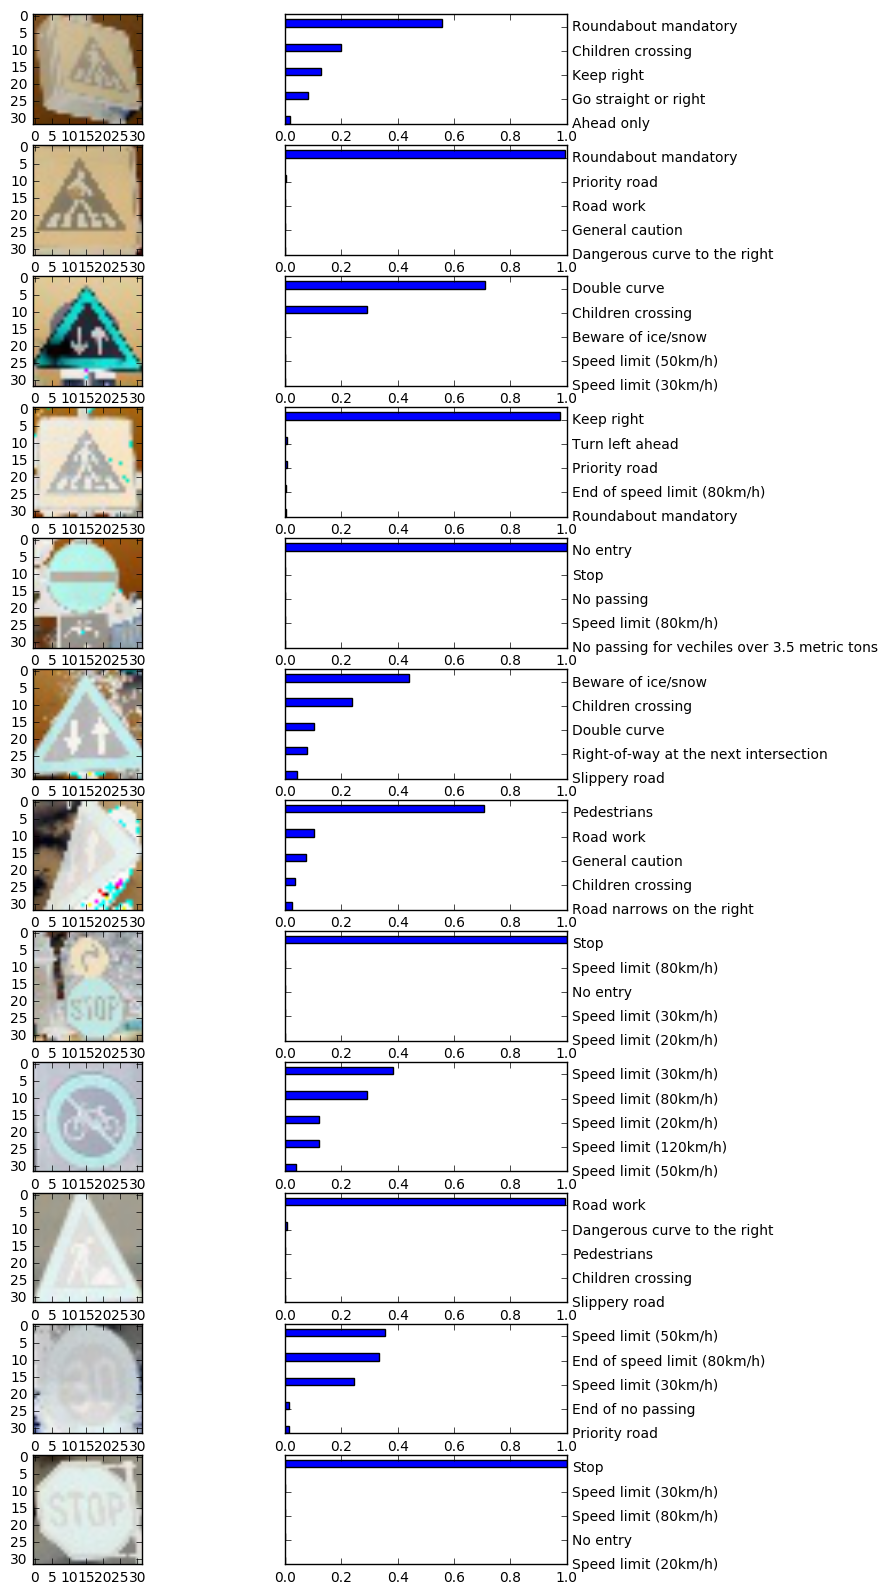

In [804]:
fnames = """rIMG_5828.jpg rIMG_5829.jpg rIMG_5831.jpg rIMG_5832.jpg
rIMG_5833.jpg rIMG_5834.jpg rIMG_5835.jpg
rIMG_5836.jpg rIMG_5845.jpg rIMG_5857.jpg
r-0.jpg r-1.jpg""".split()

my_images = np.array([ plt.imread("my_pic/%s" % fname) for fname in fnames ], dtype=np.int32)
plot_prediction_prob(model1, my_images, 5)

10/10 [==============================] - 0s


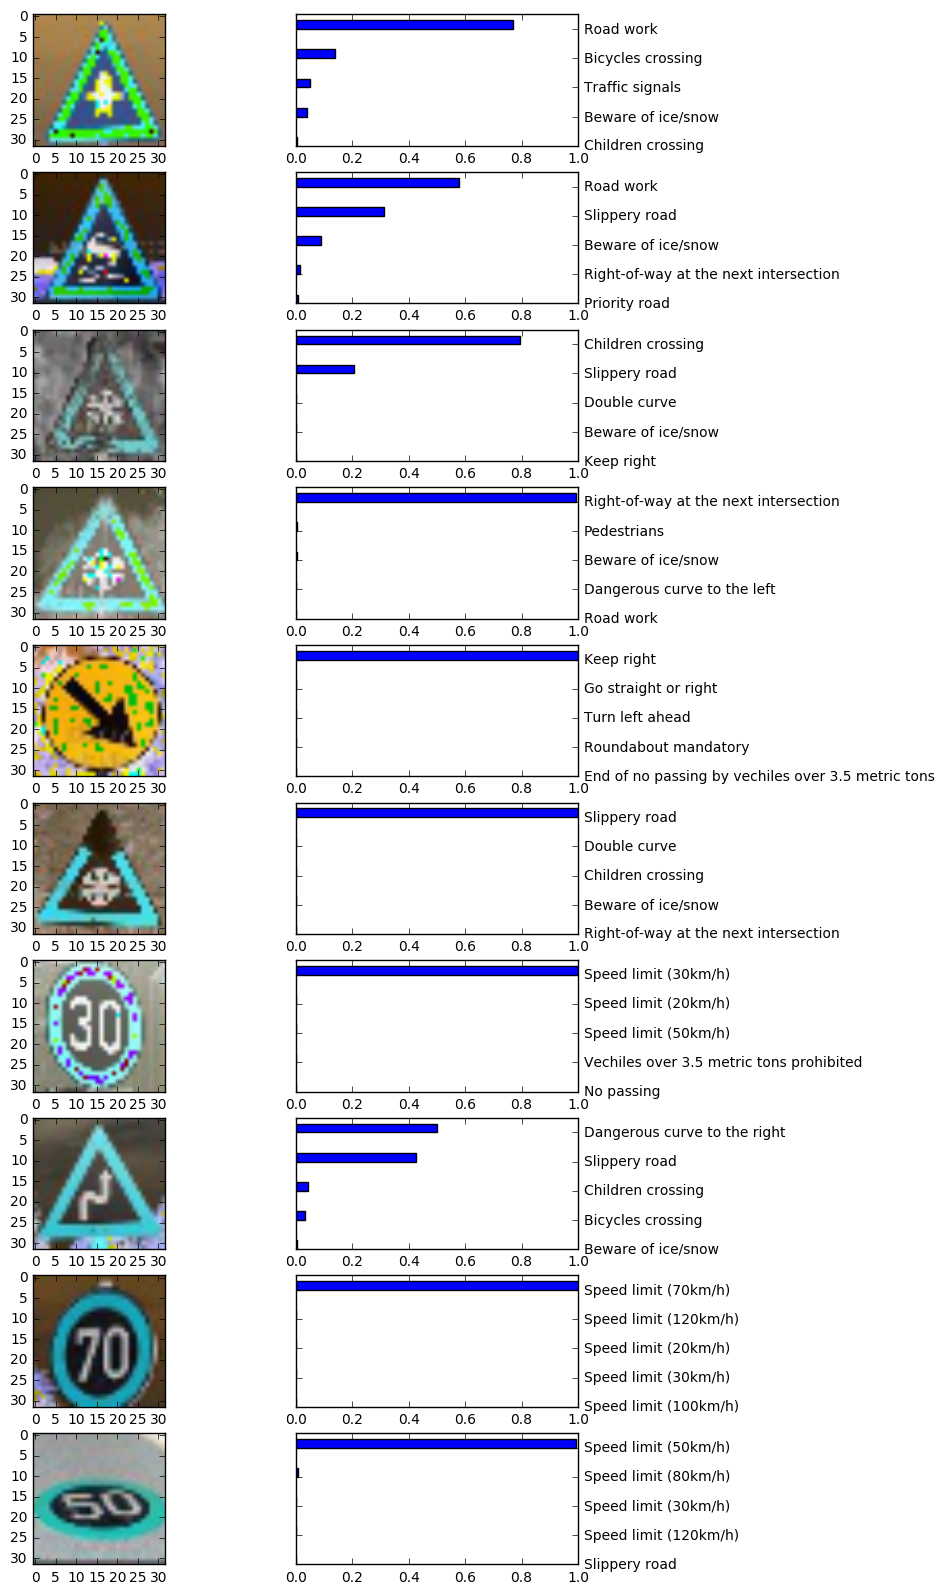

In [805]:
fnames = "web01.jpg  web02.jpg  web03.jpg  web04.jpg  web05.jpg  web06.jpg  web07.jpg  web08.jpg  web09.jpg  web10.jpg".split()
my_images = np.array([ plt.imread("my_pic/%s" % fname) for fname in fnames ], dtype=np.int32)
plot_prediction_prob(model1, my_images, 5)

12/12 [==============================] - 0s


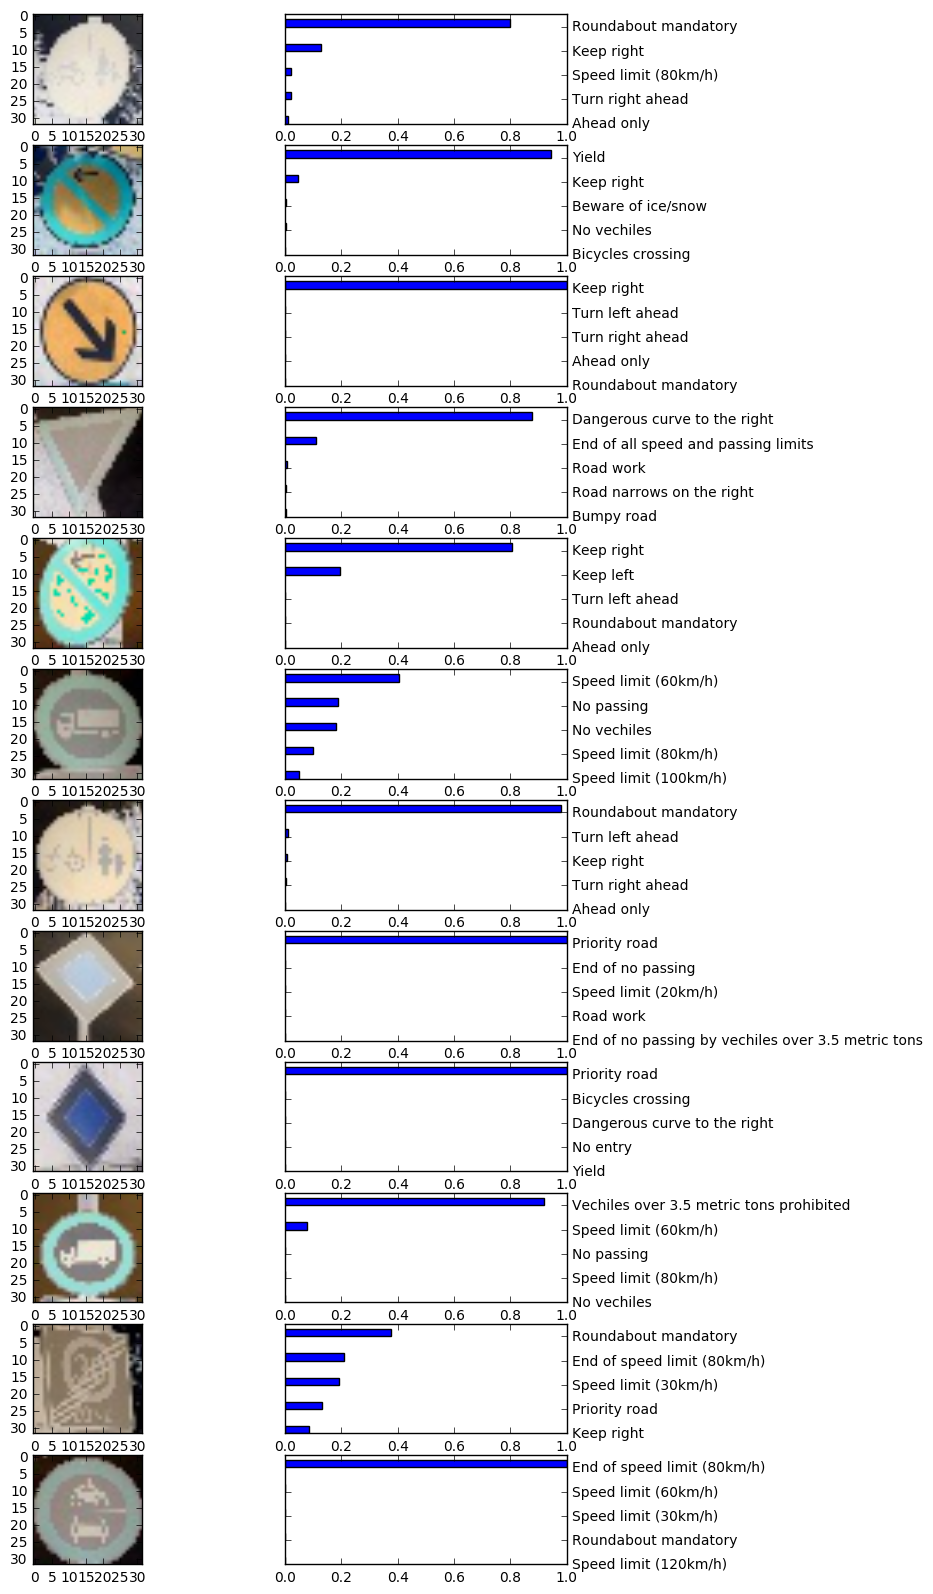

In [658]:
fnames = """rIMG_5806.jpg  rIMG_5808.jpg  rIMG_5811.jpg  rIMG_5818.jpg  rIMG_5821.jpg  rIMG_5824.jpg
rIMG_5807.jpg  rIMG_5810.jpg  rIMG_5812.jpg  rIMG_5820.jpg  rIMG_5822.jpg  rIMG_5826.jpg""".split()
my_images = np.array([ plt.imread("my_pic/%s" % fname) for fname in fnames ], dtype=np.int32)
plot_prediction_prob(model1, my_images, 5)

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

<p>Since I'm using Keras, this could be done by simply calling:</p>
<code>model1.predict_classes(X_input)</code>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.